In [1]:
# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import pandas_datareader.data as web

In [3]:
style.use('ggplot')
start=dt.datetime(2015,1,1)
end=dt.datetime.now()

In [25]:
def get_stock_price(ticker):
    df = web.DataReader(ticker,"yahoo",start,end)
    df.reset_index(inplace=True)
    #df.set_index("Date",inplace=True)
    return(df)

In [26]:
get_stock_price('TSLA')

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,45.136002,44.450001,44.618000,44.481998,11487500.0,44.481998
1,2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2,2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
3,2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
4,2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
...,...,...,...,...,...,...,...
1470,2020-11-02,406.980011,392.299988,394.000000,400.510010,29021100.0,400.510010
1471,2020-11-03,427.769989,406.690002,409.730011,423.899994,34351700.0,423.899994
1472,2020-11-04,435.399994,417.100006,430.619995,420.980011,32143100.0,420.980011
1473,2020-11-05,440.000000,424.000000,428.299988,438.089996,28414500.0,438.089996


In [71]:
def get_moving_avg():
    df = get_stock_price('KO')
    df['20 ma'] = df['Adj Close'].rolling(window=20,min_periods=0).mean()
    ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
    ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
    ax1.plot(df['Date'],df['Adj Close'],color='yellow')
    ax1.plot(df['Date'],df['20 ma'],color='cyan')
    ax2.bar(df['Date'],df['Volume'],color='blue')
    C = df['Adj Close'].tolist()
    D = df['20 ma'].tolist()
    E = df['Date'].tolist()
    for i in range(len(C)):
        if (C[i]>D[i]):
            ax1.scatter(E[i],C[i],label='Buy',color='green')
        elif (C[i]<D[i]):
            ax1.scatter(E[i],C[i],label='Sell',color='red') 
    ax1.legend('Buy')
    ax1.legend('Sell')
    plt.show()

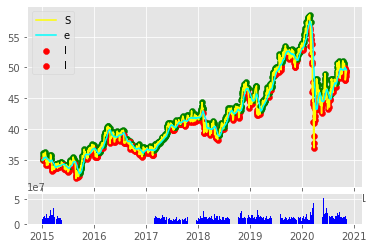

In [72]:
get_moving_avg()